# YOLOv8 Transfer Learning and Object Detection
**Author**: Qingyang Zeng 
**Date**: 12/11/2024  
**Time**: 12:51 PM  

## Overview
This notebook demonstrates the process of performing transfer learning using YOLOv8 on the KITTI dataset. It includes:
1. Setting up the environment and preparing the KITTI dataset.
2. Running transfer learning on the KITTI dataset.
3. Comparing the performance of the pretrained YOLOv8 model and the fine-tuned model.
4. Calculating inference time and class accuracy.

## 1. Environment Setup

### Description
This step prepares the environment for training and inference using YOLOv8. We:
- Check the availability of GPU for acceleration.
- Ensure all required dependencies, including the `ultralytics` library, are installed.


### Code

In [ ]:

import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

# Install YOLOv8
!pip show ultralytics

Using device: cuda
Name: ultralytics
Version: 8.3.27
Summary: Ultralytics YOLO 🚀 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: https://ultralytics.com
Author: 
Author-email: Glenn Jocher <glenn.jocher@ultralytics.com>, Jing Qiu <jing.qiu@ultralytics.com>
License: AGPL-3.0
Location: /mnt/cs/cs153/projects/bob-patrick/bbz/lib/python3.12/site-packages
Requires: matplotlib, numpy, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, torch, torchvision, tqdm, ultralytics-thop
Required-by: 


In [ ]:
import sys
print(sys.path)

['/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/mnt/cs/cs153/projects/bob-patrick/bbz/lib/python3.12/site-packages']


### Output
- Displays the available device (e.g., GPU or CPU).
- Confirms the installation of the `ultralytics` package.

## 2. Model Verification

### Description
In this step, we verify the availability and functionality of the YOLOv8 model by testing it on the Pascal VOC 2007 dataset. The tasks include:
- Importing the YOLOv8 model.
- Running object detection on a subset of images from the VOC 2007 dataset to verify the model's performance.
- Ensuring the setup is correctly configured for subsequent steps.

The process ensures efficient memory usage during inference by streaming results. Bounding boxes are drawn on detected objects, and labels with confidence scores are overlaid on the images for clear visualization.



0: 640x640 3 cars, 1 bus, 1 stop sign, 2.9ms
1: 640x640 6 airplanes, 2.9ms
2: 640x640 1 person, 1 motorcycle, 1 backpack, 2.9ms
3: 640x640 1 cat, 2.9ms
4: 640x640 1 tv, 2.9ms
5: 640x640 1 person, 1 cat, 5 chairs, 1 couch, 2 dining tables, 1 remote, 1 keyboard, 1 book, 2.9ms
6: 640x640 6 persons, 1 chair, 2.9ms
7: 640x640 1 person, 1 motorcycle, 2.9ms
8: 640x640 5 persons, 1 train, 2.9ms
9: 640x640 1 dog, 1 couch, 2.9ms
10: 640x640 1 bird, 2.9ms
11: 640x640 1 airplane, 2.9ms
12: 640x640 2 persons, 1 dog, 2 chairs, 1 couch, 1 dining table, 2.9ms
13: 640x640 13 persons, 2 cars, 1 truck, 2.9ms
14: 640x640 1 person, 2.9ms
Results for Image 1 (/mnt/cs/cs153/projects/bob-patrick/data/voc/VOCdevkit/VOC2007/JPEGImages/007855.jpg):


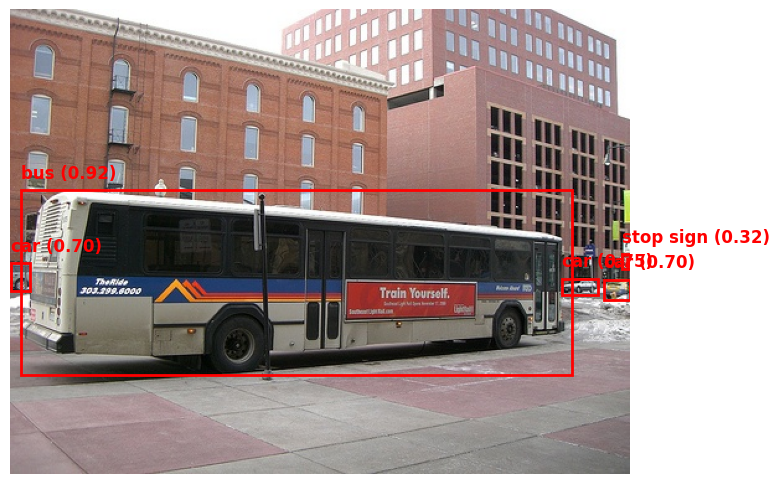

Results for Image 2 (/mnt/cs/cs153/projects/bob-patrick/data/voc/VOCdevkit/VOC2007/JPEGImages/001288.jpg):


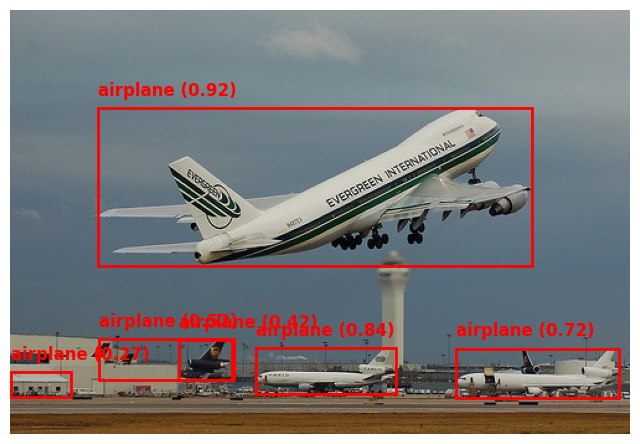

Results for Image 3 (/mnt/cs/cs153/projects/bob-patrick/data/voc/VOCdevkit/VOC2007/JPEGImages/009494.jpg):


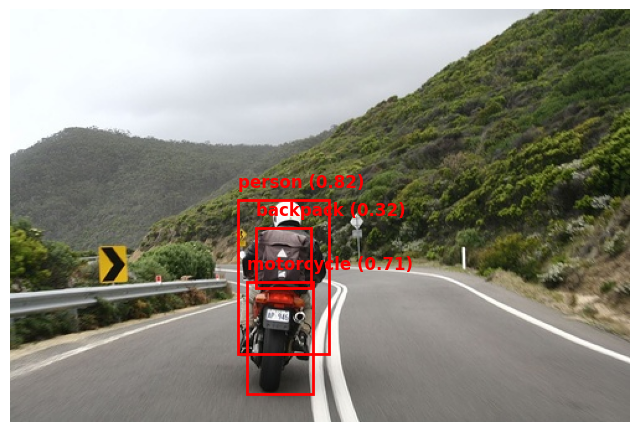

Results for Image 4 (/mnt/cs/cs153/projects/bob-patrick/data/voc/VOCdevkit/VOC2007/JPEGImages/009035.jpg):


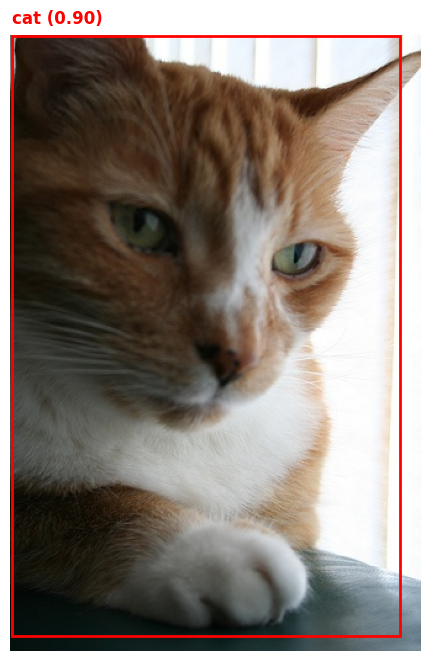

Results for Image 5 (/mnt/cs/cs153/projects/bob-patrick/data/voc/VOCdevkit/VOC2007/JPEGImages/006704.jpg):


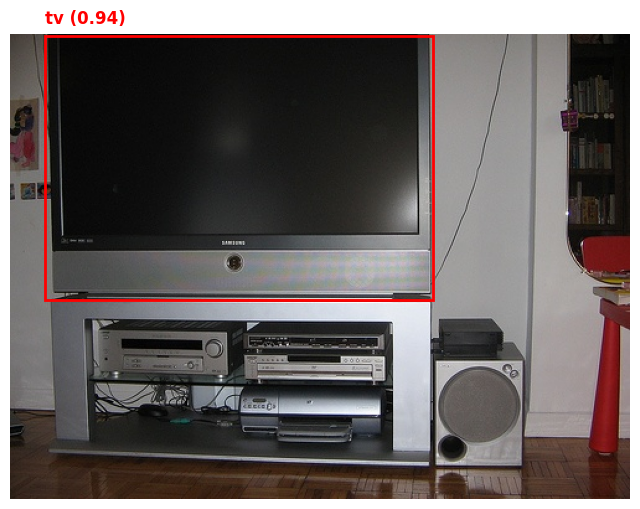

Results for Image 6 (/mnt/cs/cs153/projects/bob-patrick/data/voc/VOCdevkit/VOC2007/JPEGImages/003751.jpg):


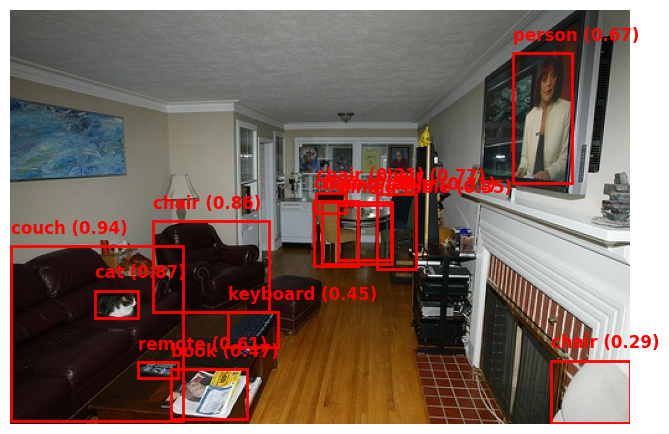

Results for Image 7 (/mnt/cs/cs153/projects/bob-patrick/data/voc/VOCdevkit/VOC2007/JPEGImages/005451.jpg):


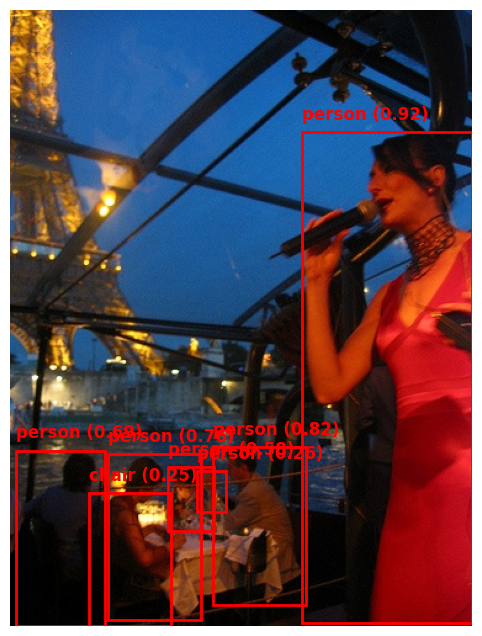

Results for Image 8 (/mnt/cs/cs153/projects/bob-patrick/data/voc/VOCdevkit/VOC2007/JPEGImages/009691.jpg):


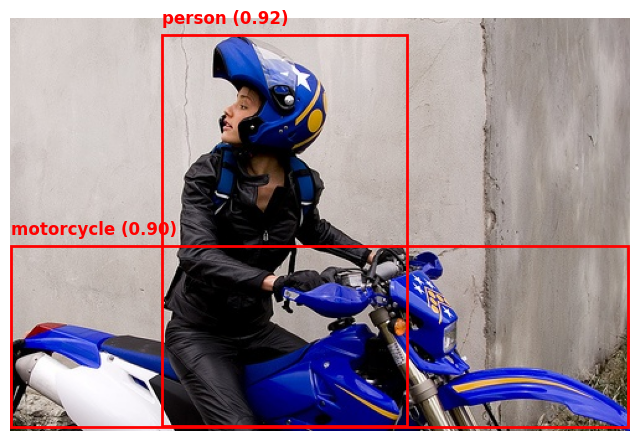

Results for Image 9 (/mnt/cs/cs153/projects/bob-patrick/data/voc/VOCdevkit/VOC2007/JPEGImages/009946.jpg):


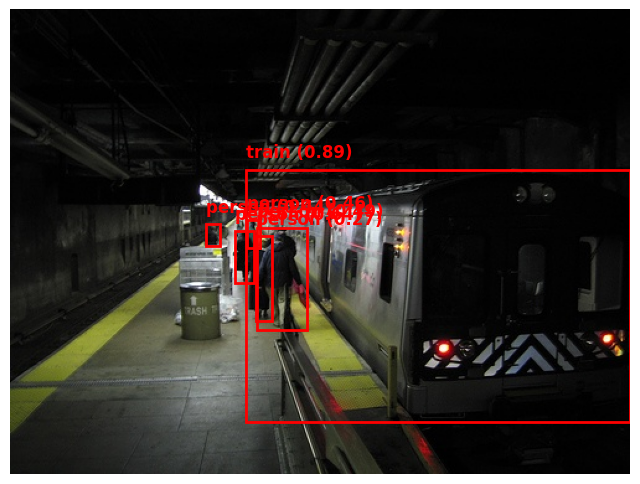

Results for Image 10 (/mnt/cs/cs153/projects/bob-patrick/data/voc/VOCdevkit/VOC2007/JPEGImages/000537.jpg):


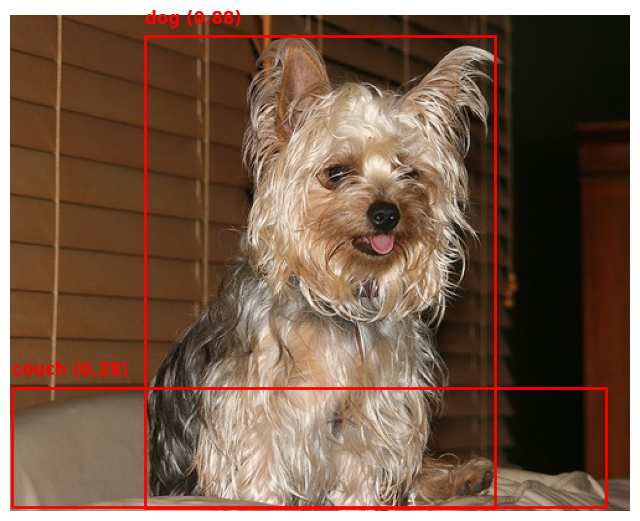

Results for Image 11 (/mnt/cs/cs153/projects/bob-patrick/data/voc/VOCdevkit/VOC2007/JPEGImages/008635.jpg):


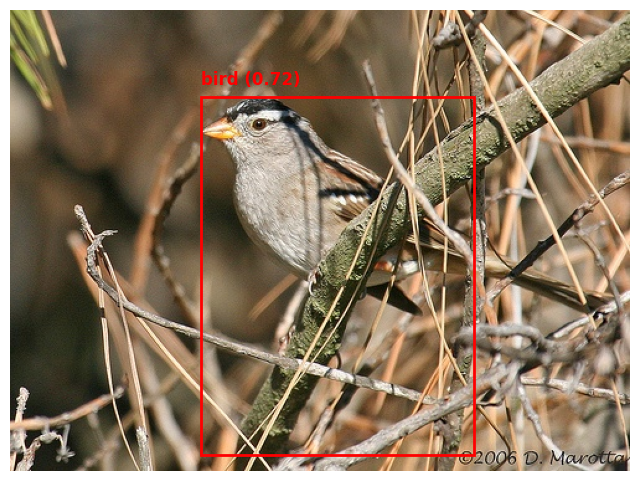

Results for Image 12 (/mnt/cs/cs153/projects/bob-patrick/data/voc/VOCdevkit/VOC2007/JPEGImages/008723.jpg):


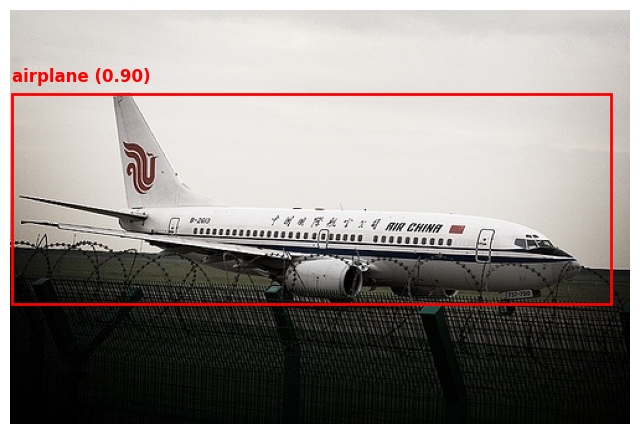

Results for Image 13 (/mnt/cs/cs153/projects/bob-patrick/data/voc/VOCdevkit/VOC2007/JPEGImages/002055.jpg):


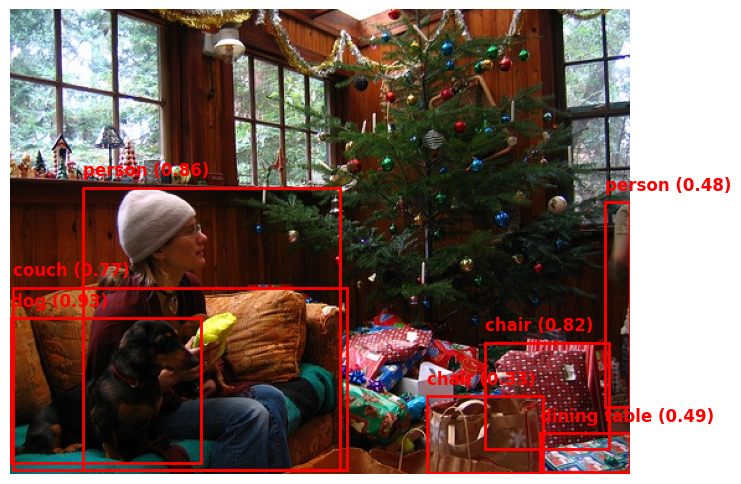

Results for Image 14 (/mnt/cs/cs153/projects/bob-patrick/data/voc/VOCdevkit/VOC2007/JPEGImages/000083.jpg):


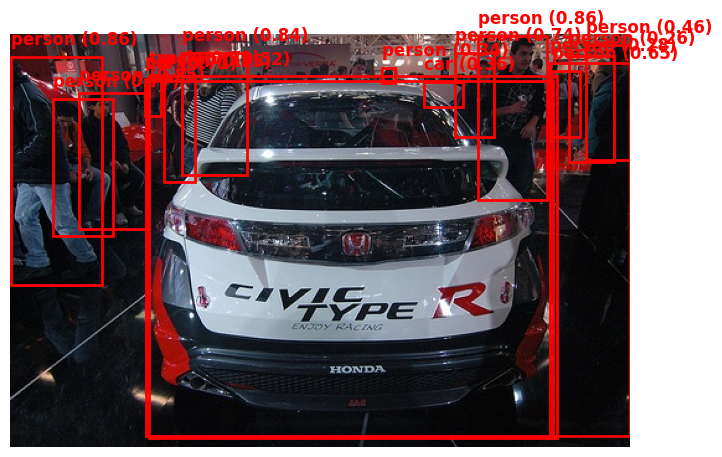

Results for Image 15 (/mnt/cs/cs153/projects/bob-patrick/data/voc/VOCdevkit/VOC2007/JPEGImages/009089.jpg):


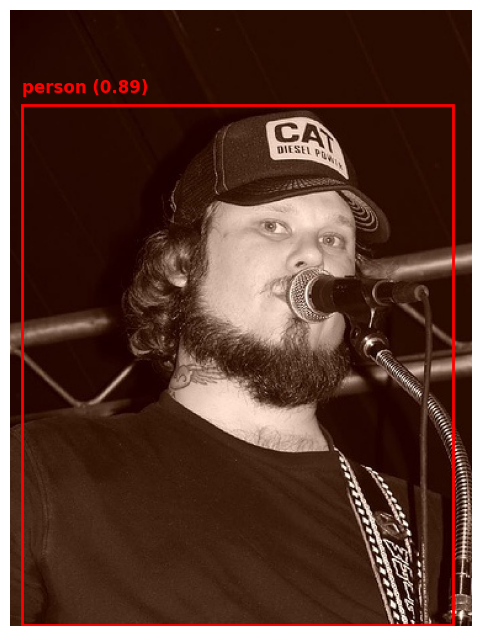

In [ ]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

model = YOLO("yolov8s.pt")

# Correct image path for Pascal VOC dataset
images_path = "/mnt/cs/cs153/projects/bob-patrick/data/voc/VOCdevkit/VOC2007/JPEGImages"

# List all image files in the specified path and select the first 10
images = [os.path.join(images_path, img) for img in os.listdir(images_path) if img.endswith(('.jpg', '.png'))][:15]

# Run inference on the first 10 images with streaming to prevent memory overload
results = model(images, stream=True)

# Display each image with detections
for i, (img_path, result) in enumerate(zip(images, results)):
    # Load the original image
    img = Image.open(img_path)
    
    # Display the image with matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    ax = plt.gca()
    
    # Print detection results and draw bounding boxes
    print(f"Results for Image {i+1} ({img_path}):")
    for box in result.boxes:
        class_id = int(box.cls)
        class_name = result.names.get(class_id, "Unknown")  # Safely access class name
        confidence = float(box.conf)  # Convert tensor to float
        bbox = box.xyxy.cpu().numpy().flatten()  # Move to CPU, convert to numpy, and flatten
        
        # Ensure bbox has exactly 4 values before unpacking
        if bbox.shape[0] == 4:
            x1, y1, x2, y2 = bbox  # Unpack bounding box coordinates
            box_width = x2 - x1
            box_height = y2 - y1
            rect = patches.Rectangle((x1, y1), box_width, box_height, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            
            # Draw the label
            plt.text(x1, y1 - 10, f"{class_name} ({confidence:.2f})", color='red', fontsize=12, weight='bold')
        else:
            print(f"Unexpected bbox shape: {bbox.shape} for {bbox}")
    
    # Show the annotated image
    plt.axis("off")
    plt.show()


## 3. Dataset Preparation from Roboflow

### Description
In this step, I am importing Roboflow and using the KITTI dataset hosted on Roboflow for transfer learning. Key points include:
- **Installing and importing Roboflow**: This enables seamless interaction with the Roboflow API.
- **Accessing the KITTI dataset**: The dataset is downloaded in YOLOv8 format and includes a pre-configured YAML file, which simplifies the setup for transfer learning.
- **Using the pre-stretched 640x640 dataset**: Since the dataset is already resized to 640x640, no additional preparation is required.

This setup ensures the dataset is ready for use with the YOLOv8 pretrained model in the next step, where we will conduct transfer learning.



In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="S00lJkB8yfKn1O2UccEc")
project = rf.workspace("sebastian-krauss").project("kitti-9amcz")
version = project.version(3)
dataset = version.download("yolov8")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 46.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to KITTI-3 in yolov8:: 100%|██████████| 14940/14940 [00:31<00:00, 480.91it/s] 


## 4. Transfer Learning with YOLOv8

### Description
This step performs transfer learning on the KITTI dataset using a pretrained YOLOv8 model. The tasks include:
- **Loading the pretrained YOLOv8 model**: A smaller variant (`yolov8n.pt`) is used for efficient training, with an option to switch to a larger model (`yolov8s.pt`) if GPU resources are available.
- **Using the provided YAML file**: The KITTI dataset configuration is streamlined by leveraging the YAML file downloaded earlier from Roboflow.
- **Training parameters**:
  - **Epochs**: 50 iterations for sufficient model fine-tuning.
  - **Image size**: 640x640, consistent with the dataset preparation.
  - **Batch size**: 16, optimized for GPU capabilities.
  - **Project and run name**: Results are saved in the `kitti_project` directory under the name `kitti_transfer`.

This step adapts the pretrained YOLOv8 model to the specific characteristics of the KITTI dataset, enabling improved performance on the task.


In [3]:
from ultralytics import YOLO

# Load the pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # Use 'yolov8s.pt' for a larger model if you have GPU resources

# Train the model
model.train(
    data="/mnt/cs/cs153/projects/bob-patrick/KITTI-3/data.yaml",  # Path to the YAML file
    epochs=50,                  # Number of training epochs
    imgsz=640,                  # Image size
    batch=16,                   # Batch size; adjust based on GPU capability
    project="kitti_project",    # Directory to save results
    name="kitti_transfer"       # Run name
)


New https://pypi.org/project/ultralytics/8.3.39 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.27 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/mnt/cs/cs153/projects/bob-patrick/KITTI-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=kitti_project, name=kitti_transfer2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=Non

100%|██████████| 755k/755k [00:00<00:00, 53.7MB/s]

Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    752872  ultralytics.nn.modules.head.Detect           [8, [64, 128, 256]]           
Model summary: 225 layers, 3,012,408 parameters, 3,012,392 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 87.3MB/s]


AMP: checks passed ✅


train: Scanning /mnt/cs/cs153/projects/bob-patrick/KITTI-3/train/labels... 5223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5223/5223 [00:04<00:00, 1114.63it/s]


train: New cache created: /mnt/cs/cs153/projects/bob-patrick/KITTI-3/train/labels.cache


val: Scanning /mnt/cs/cs153/projects/bob-patrick/KITTI-3/valid/labels... 1495 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1495/1495 [00:00<00:00, 1815.96it/s]

val: New cache created: /mnt/cs/cs153/projects/bob-patrick/KITTI-3/valid/labels.cache


Plotting labels to kitti_project/kitti_transfer2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to kitti_project/kitti_transfer2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.39G       1.45      1.949      1.244         55        640: 100%|██████████| 327/327 [00:23<00:00, 14.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:04<00:00,  9.84it/s]


                   all       1495       8018      0.502      0.325      0.335        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.32G      1.297      1.352      1.177         64        640: 100%|██████████| 327/327 [00:17<00:00, 19.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.20it/s]

                   all       1495       8018      0.491      0.397      0.365      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.34G      1.265       1.21      1.166         84        640: 100%|██████████| 327/327 [00:16<00:00, 19.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.00it/s]

                   all       1495       8018      0.641      0.401      0.431      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.33G      1.232      1.118       1.16         69        640: 100%|██████████| 327/327 [00:17<00:00, 18.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.29it/s]

                   all       1495       8018      0.646      0.439      0.479      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.27G      1.194       1.05      1.142         82        640: 100%|██████████| 327/327 [00:16<00:00, 19.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.47it/s]

                   all       1495       8018      0.652      0.489      0.569       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.31G      1.164     0.9887      1.127         71        640: 100%|██████████| 327/327 [00:15<00:00, 20.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.33it/s]

                   all       1495       8018      0.672      0.535      0.594      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.52G      1.153     0.9608      1.122         38        640: 100%|██████████| 327/327 [00:15<00:00, 20.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.30it/s]

                   all       1495       8018      0.621      0.607       0.64      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.35G       1.12     0.9224      1.106         60        640: 100%|██████████| 327/327 [00:16<00:00, 19.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.46it/s]

                   all       1495       8018      0.664      0.601      0.653      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.3G      1.105     0.8904        1.1         48        640: 100%|██████████| 327/327 [00:15<00:00, 20.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.25it/s]

                   all       1495       8018      0.744      0.573      0.651      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.34G      1.088      0.862      1.092         66        640: 100%|██████████| 327/327 [00:15<00:00, 20.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.48it/s]

                   all       1495       8018      0.654      0.636      0.659      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.45G      1.085     0.8598      1.093         48        640: 100%|██████████| 327/327 [00:15<00:00, 20.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.12it/s]

                   all       1495       8018      0.769      0.603      0.707      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.42G      1.062     0.8322      1.078         48        640: 100%|██████████| 327/327 [00:15<00:00, 20.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.38it/s]

                   all       1495       8018      0.687      0.673      0.704      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.3G      1.054     0.8167      1.078         60        640: 100%|██████████| 327/327 [00:15<00:00, 20.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.43it/s]

                   all       1495       8018      0.753      0.638      0.726      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.37G       1.05     0.8072      1.073         63        640: 100%|██████████| 327/327 [00:15<00:00, 20.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.26it/s]

                   all       1495       8018      0.786      0.645      0.744      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.29G       1.04     0.7929       1.07         73        640: 100%|██████████| 327/327 [00:16<00:00, 20.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.45it/s]

                   all       1495       8018      0.744      0.678       0.74      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.34G      1.027     0.7765      1.065         53        640: 100%|██████████| 327/327 [00:16<00:00, 20.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.55it/s]

                   all       1495       8018      0.774      0.688      0.761      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.39G      1.025     0.7661      1.061        126        640: 100%|██████████| 327/327 [00:17<00:00, 19.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.60it/s]

                   all       1495       8018      0.779      0.679      0.772      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       2.3G      1.013     0.7627      1.059         62        640: 100%|██████████| 327/327 [00:16<00:00, 19.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.36it/s]

                   all       1495       8018      0.738      0.703      0.753      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.43G     0.9944     0.7393      1.049         58        640: 100%|██████████| 327/327 [00:14<00:00, 22.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.29it/s]

                   all       1495       8018      0.772      0.701      0.769      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.29G     0.9889     0.7301      1.049         44        640: 100%|██████████| 327/327 [00:16<00:00, 20.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.01it/s]

                   all       1495       8018      0.739       0.74      0.779      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.41G     0.9928     0.7293      1.046         55        640: 100%|██████████| 327/327 [00:17<00:00, 18.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.47it/s]

                   all       1495       8018      0.787      0.722      0.789       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.55G      0.972     0.7189      1.037         57        640: 100%|██████████| 327/327 [00:16<00:00, 20.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.69it/s]

                   all       1495       8018      0.802      0.738      0.797      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.21G      0.963     0.7062      1.035         33        640: 100%|██████████| 327/327 [00:15<00:00, 20.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.47it/s]

                   all       1495       8018      0.834       0.71      0.802       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.29G     0.9634     0.7126      1.034         60        640: 100%|██████████| 327/327 [00:16<00:00, 20.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.42it/s]

                   all       1495       8018      0.798      0.729      0.799      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.26G     0.9576     0.6968      1.032         60        640: 100%|██████████| 327/327 [00:15<00:00, 20.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.56it/s]

                   all       1495       8018      0.781       0.75       0.81      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.42G     0.9472     0.6839       1.03         69        640: 100%|██████████| 327/327 [00:15<00:00, 21.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.47it/s]

                   all       1495       8018      0.792      0.725      0.799      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.33G     0.9383     0.6773      1.025         37        640: 100%|██████████| 327/327 [00:16<00:00, 19.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.53it/s]

                   all       1495       8018      0.807      0.741      0.812      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.48G     0.9287     0.6721       1.02         68        640: 100%|██████████| 327/327 [00:16<00:00, 20.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 12.96it/s]

                   all       1495       8018      0.853      0.744      0.821      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.29G     0.9317     0.6721      1.022         57        640: 100%|██████████| 327/327 [00:16<00:00, 20.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.33it/s]

                   all       1495       8018      0.827      0.773      0.823      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.31G     0.9218     0.6581      1.016         45        640: 100%|██████████| 327/327 [00:16<00:00, 20.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.52it/s]

                   all       1495       8018      0.824      0.754      0.825       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       2.5G     0.9204     0.6587      1.016         49        640: 100%|██████████| 327/327 [00:16<00:00, 20.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.64it/s]


                   all       1495       8018       0.83      0.749      0.824       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.38G      0.915     0.6488      1.013         44        640: 100%|██████████| 327/327 [00:15<00:00, 20.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.72it/s]


                   all       1495       8018      0.828      0.762      0.834      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.4G     0.9096     0.6509      1.014         52        640: 100%|██████████| 327/327 [00:16<00:00, 20.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.59it/s]

                   all       1495       8018      0.845      0.767      0.841      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.42G     0.9019      0.634      1.008         52        640: 100%|██████████| 327/327 [00:16<00:00, 20.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.57it/s]

                   all       1495       8018      0.815      0.766      0.829      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.34G     0.8919     0.6272      1.002         74        640: 100%|██████████| 327/327 [00:15<00:00, 20.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.44it/s]

                   all       1495       8018      0.835      0.788      0.845      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.41G     0.8941     0.6326      1.008         58        640: 100%|██████████| 327/327 [00:16<00:00, 20.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.45it/s]

                   all       1495       8018      0.857      0.784      0.846      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.39G     0.8831     0.6213      1.002         51        640: 100%|██████████| 327/327 [00:16<00:00, 19.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.48it/s]

                   all       1495       8018      0.838       0.79      0.845      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.3G     0.8765     0.6163     0.9973         49        640: 100%|██████████| 327/327 [00:15<00:00, 20.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.62it/s]

                   all       1495       8018      0.804      0.781      0.834       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.43G     0.8703     0.6096     0.9935         55        640: 100%|██████████| 327/327 [00:15<00:00, 20.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.45it/s]

                   all       1495       8018      0.831      0.781      0.853      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.37G     0.8679     0.6035     0.9947         41        640: 100%|██████████| 327/327 [00:16<00:00, 19.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.55it/s]


                   all       1495       8018      0.838      0.786      0.855      0.608
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.25G     0.8139     0.5292     0.9724         35        640: 100%|██████████| 327/327 [00:16<00:00, 20.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.60it/s]

                   all       1495       8018      0.829      0.805      0.847        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.11G     0.7974     0.5157     0.9665         47        640: 100%|██████████| 327/327 [00:15<00:00, 20.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.67it/s]


                   all       1495       8018      0.842      0.797       0.86      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       2.2G     0.7874     0.5108     0.9617         33        640: 100%|██████████| 327/327 [00:15<00:00, 20.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.68it/s]

                   all       1495       8018      0.854        0.8       0.86      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.13G     0.7782     0.4989      0.959         28        640: 100%|██████████| 327/327 [00:15<00:00, 20.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.62it/s]

                   all       1495       8018      0.856      0.805      0.862      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.13G     0.7737     0.4984     0.9557         36        640: 100%|██████████| 327/327 [00:15<00:00, 20.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.45it/s]

                   all       1495       8018      0.862      0.801      0.859       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.12G     0.7667     0.4923     0.9525         39        640: 100%|██████████| 327/327 [00:15<00:00, 20.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.16it/s]

                   all       1495       8018      0.853      0.807      0.862      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.17G     0.7587     0.4889      0.952         47        640: 100%|██████████| 327/327 [00:15<00:00, 20.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.62it/s]

                   all       1495       8018      0.863      0.802      0.864      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.13G     0.7508     0.4814     0.9461         35        640: 100%|██████████| 327/327 [00:15<00:00, 20.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.50it/s]


                   all       1495       8018      0.886      0.787      0.867      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       2.1G     0.7474     0.4815     0.9468         26        640: 100%|██████████| 327/327 [00:15<00:00, 20.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.31it/s]

                   all       1495       8018       0.87      0.805      0.865      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.12G     0.7407     0.4773     0.9436         28        640: 100%|██████████| 327/327 [00:16<00:00, 20.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 13.60it/s]


                   all       1495       8018      0.872      0.803      0.867      0.636

50 epochs completed in 0.288 hours.
Optimizer stripped from kitti_project/kitti_transfer2/weights/last.pt, 6.3MB
Optimizer stripped from kitti_project/kitti_transfer2/weights/best.pt, 6.3MB

Validating kitti_project/kitti_transfer2/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:04<00:00,  9.85it/s]


                   all       1495       8018      0.886      0.788      0.866      0.637
                   Car       1336       5627      0.936      0.926      0.973      0.808
               Cyclist        227        330       0.88       0.73      0.835      0.547
                  Misc        159        196      0.906      0.788      0.859      0.641
            Pedestrian        370        905      0.907      0.593      0.798      0.434
        Person_sitting         22         52      0.734        0.5      0.587      0.349
                  Tram         67        113      0.832      0.929       0.94       0.73
                 Truck        219        230      0.982      0.941      0.986      0.828
                   Van        422        565      0.913      0.896      0.952      0.758
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to kitti_project/kitti_transfer2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f5041e641d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

## 4. Validation and Metrics Extraction

### Description
This step evaluates the performance of the YOLOv8 model after transfer learning on the KITTI dataset. The tasks include:
- **Loading the fine-tuned model**: The best weights from the training process (`kitti_transfer2`) are loaded for validation.
- **Performing validation**: The model is validated against the KITTI dataset using the provided YAML configuration file.
- **Extracting metrics**:
  - Key metrics, such as mAP (mean Average Precision), precision, and recall, are stored in a dictionary for analysis.
  - Class names are extracted for interpreting validation results.

The validation results (`Val4`) provide insights into the model's performance after transfer learning on the KITTI dataset.


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO("kitti_project/kitti_transfer2/weights/best.pt")

# Perform validation
results = model.val(data="/mnt/cs/cs153/projects/bob-patrick/KITTI-3/data.yaml")

# Extract metrics
metrics_dict = results.results_dict
class_names = results.names  # Class names

Ultralytics 8.3.27 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /mnt/cs/cs153/projects/bob-patrick/KITTI-3/valid/labels.cache... 1495 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1495/1495 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 1/94 [00:00<00:58,  1.60it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:05<00:00, 16.51it/s]


                   all       1495       8018      0.887      0.788      0.866      0.636
                   Car       1336       5627      0.936      0.926      0.973      0.809
               Cyclist        227        330      0.876       0.73      0.834      0.546
                  Misc        159        196      0.906      0.785      0.859      0.638
            Pedestrian        370        905      0.913      0.594      0.803      0.433
        Person_sitting         22         52      0.734        0.5      0.586       0.34
                  Tram         67        113      0.832      0.929       0.94      0.732
                 Truck        219        230      0.982      0.941      0.985      0.828
                   Van        422        565      0.914      0.896      0.952       0.76
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val4


## 5. Validation of Pretrained YOLOv8 Model

### Description
In this step, we evaluate the performance of the pretrained YOLOv8 model on the KITTI dataset to establish a baseline for comparison with the fine-tuned model. The tasks include:
- **Loading the pretrained YOLOv8 model**: A nano variant (`yolov8n.pt`) is used for validation.
- **Performing validation**: The model is validated against the KITTI dataset using the YAML configuration file, with a confidence threshold set at 0.5.
- **Extracting key metrics**:
  - A **confusion matrix** is generated to analyze the relationship between predicted and true class labels.
  - **Class names** are extracted for interpreting the validation metrics.

The results provide baseline metrics, including mAP, precision, and recall, to compare against the transfer learning results.


In [19]:
from ultralytics import YOLO

# Load pre-trained YOLOv8 model
model_2 = YOLO('yolov8n.pt')  # Choose a model variant (nano, small, medium, etc.)
# Validate pre-trained model on KITTI-3
results = model_2.val(data="/mnt/cs/cs153/projects/bob-patrick/KITTI-3/data.yaml", conf=0.5)


# Get confusion matrix
confusion_matrix = results.confusion_matrix  # Shape (num_classes, num_classes)

# Get class names
class_names = results.names



Ultralytics 8.3.27 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /mnt/cs/cs153/projects/bob-patrick/KITTI-3/valid/labels.cache... 1495 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1495/1495 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [02:04<00:00,  1.33s/it]


                   all       1495       8018      0.177     0.0255     0.0955     0.0598
                person       1336       5627      0.439    0.00444      0.221      0.137
               bicycle        227        330      0.167     0.0121     0.0885      0.011
                   car        159        196          0          0          0          0
            motorcycle        370        905          0          0          0          0
              airplane         22         52          0          0          0          0
                   bus         67        113          0          0          0          0
                 train        219        230      0.252      0.143      0.156      0.102
                 truck        422        565      0.556     0.0442      0.299      0.229
Speed: 0.1ms preprocess, 81.2ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val10


## 6. Class Accuracy Calculation for Pretrained YOLOv8 Model

### Description
In this step, we calculate the class-wise accuracy for the pretrained YOLOv8 model based on the validation results. The process involves:
- **Accessing the confusion matrix**: Extracting it as a numpy array for numerical operations.
- **Calculating accuracy for each class**:
  - True Positives (TP): Correct predictions for each class.
  - False Positives (FP): Incorrect predictions for each class.
  - Class accuracy is computed as \( \text{Accuracy} = \frac{\text{TP}}{\text{TP} + \text{FP}} \), avoiding division by zero.
- **Visualizing the results**: Presenting class accuracies in a pandas DataFrame for clarity.

### Notes
- This step provides a detailed breakdown of the model's accuracy across different classes.
- The sample data showcases class accuracy, although it does not narrow down to traffic objects specifically.

This analysis highlights the performance of the pretrained YOLOv8 model in correctly identifying objects within the KITTI dataset.


In [ ]:
import numpy as np
import pandas as pd
# Access the confusion matrix as a numpy array
conf_matrix = confusion_matrix.matrix  # Convert to a numpy array

# Initialize accuracy list
accuracies = []

# Calculate accuracy for each class
for i in range(len(class_names)):
    TP = conf_matrix[i, i]  # True positives for class i
    FP = conf_matrix[:, i].sum() - TP  # False positives for class i
    total_predictions = TP + FP  # Total predictions for class i
    accuracy = TP / total_predictions if total_predictions > 0 else 0  # Avoid division by zero
    accuracies.append(accuracy)

# Create a DataFrame for better visualization
accuracy_df = pd.DataFrame({
    "Class": [class_names[i] for i in range(len(class_names))],
    "Accuracy": accuracies
})

# Display accuracy
print(accuracy_df)

         Class  Accuracy
0       person  0.004621
1      bicycle  0.015152
2          car  0.000000
3   motorcycle  0.000000
4     airplane  0.000000
..         ...       ...
75        vase  0.000000
76    scissors  0.000000
77  teddy bear  0.000000
78  hair drier  0.000000
79  toothbrush  0.000000

[80 rows x 2 columns]


## 8. Visualizing Top 10 Class Accuracy

### Description
This step involves visualizing the top 10 class-wise accuracies of the pretrained YOLOv8 model. The process includes:
- **Filtering the top 10 classes**: Selecting the classes with the highest accuracy scores from the previously calculated results.
- **Creating a bar plot**:
  - X-axis: Class names.
  - Y-axis: Accuracy values (ranging from 0 to 1).
  - Title: "Top 10 Class-wise Accuracy."
- **Saving the visualization**: The plot is saved to a specified directory for future reference.

### Notes
- This visualization highlights the pretrained model's strongest object detection capabilities across the top 10 performing classes.
- The saved graph can be used for presentations or detailed performance analysis.

This step provides an intuitive understanding of the model's performance distribution among the top classes.


In [26]:
# Assuming `accuracy_df` is already created, select the first 10 classes
top_10_accuracy_df = accuracy_df.iloc[:10]  # Select the first 10 classes

# Specify the path where the graph will be saved
save_path = "/mnt/cs/cs153/projects/bob-patrick/runs/detect/val7/top_10_class_wise_accuracy.png"

# Plot the top 10 class-wise accuracy
plt.figure(figsize=(10, 6))
plt.bar(top_10_accuracy_df["Class"], top_10_accuracy_df["Accuracy"], color='skyblue')
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.title("Top 10 Class-wise Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Accuracy values range from 0 to 1
plt.tight_layout()

# Save the plot
plt.savefig(save_path)
plt.close()

print(f"Graph for top 10 classes saved successfully at {save_path}")


Graph for top 10 classes saved successfully at /mnt/cs/cs153/projects/bob-patrick/runs/detect/val7/top_10_class_wise_accuracy.png


## 9. Class Accuracy Calculation for Transfer Learning Model

### Description
In this step, we calculate the class-wise accuracy for the fine-tuned YOLOv8 model after transfer learning on the KITTI dataset. The process includes:
- **Loading the fine-tuned model**: The best weights from the transfer learning phase are loaded for evaluation.
- **Performing validation**: The model is validated against the KITTI dataset using the YAML configuration file, with a confidence threshold of 0.5.
- **Extracting the confusion matrix**: Used to calculate the true positives (TP) and false positives (FP) for each class.
- **Retrieving class names**: Enables interpretation of the calculated metrics.

### Notes
- This step allows for a direct comparison of class-wise accuracy between the pretrained and transfer learning models.
- The results demonstrate the improvements achieved through transfer learning on the KITTI dataset.

This analysis provides a deeper understanding of how transfer learning impacts model accuracy across different object categories.


In [ ]:


# Load the trained model
model = YOLO("kitti_project/kitti_transfer2/weights/best.pt")  # Replace with the correct path

# Perform validation and extract confusion matrix
results = model.val(data="/mnt/cs/cs153/projects/bob-patrick/KITTI-3/data.yaml", conf=0.5)

# Get confusion matrix
confusion_matrix = results.confusion_matrix  # Shape (num_classes, num_classes)

# Get class names
class_names = results.names



Ultralytics 8.3.27 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /mnt/cs/cs153/projects/bob-patrick/KITTI-3/valid/labels.cache... 1495 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1495/1495 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:05<00:00, 18.31it/s]


                   all       1495       8018      0.905      0.775      0.856       0.67
                   Car       1336       5627      0.947       0.92      0.952      0.826
               Cyclist        227        330      0.897      0.712      0.829        0.6
                  Misc        159        196      0.915       0.77      0.868      0.695
            Pedestrian        370        905      0.938      0.547      0.751      0.468
        Person_sitting         22         52      0.765        0.5       0.62      0.396
                  Tram         67        113      0.868      0.929       0.93      0.749
                 Truck        219        230      0.986      0.935      0.963      0.843
                   Van        422        565      0.924      0.887      0.931      0.784
Speed: 0.2ms preprocess, 0.5ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val11


In [15]:
# Access the confusion matrix as a numpy array
conf_matrix = confusion_matrix.matrix  # Convert to a numpy array

# Initialize accuracy list
accuracies = []

# Calculate accuracy for each class
for i in range(len(class_names)):
    TP = conf_matrix[i, i]  # True positives for class i
    FP = conf_matrix[:, i].sum() - TP  # False positives for class i
    total_predictions = TP + FP  # Total predictions for class i
    accuracy = TP / total_predictions if total_predictions > 0 else 0  # Avoid division by zero
    accuracies.append(accuracy)

# Create a DataFrame for better visualization
accuracy_df = pd.DataFrame({
    "Class": [class_names[i] for i in range(len(class_names))],
    "Accuracy": accuracies
})

# Display accuracy
print(accuracy_df)



            Class  Accuracy
0             Car  0.920206
1         Cyclist  0.712121
2            Misc  0.775510
3      Pedestrian  0.551381
4  Person_sitting  0.500000
5            Tram  0.929204
6           Truck  0.934783
7             Van  0.881416


## 11. Saving Class Accuracy Plot for Transfer Learning Model

### Description
This step involves creating and saving a plot of class-wise accuracy for the transfer learning model. The process includes:
- **Generating accuracy data**: Class-wise accuracy values are obtained from the validation results of the fine-tuned model.
- **Creating a bar plot**:
  - X-axis: Class names.
  - Y-axis: Accuracy values (ranging from 0 to 1).
  - Title: "Class-wise Accuracy."
- **Saving the plot**:
  - Ensures the output directory exists.
  - Saves the plot as `class_wise_accuracy.png` in the specified directory.

### Notes
- This visualization provides a clear and detailed representation of the transfer learning model's performance across all classes.
- The saved plot serves as a valuable resource for presentations and comparative analysis.

The saved plot allows for easy identification of the model's strengths and areas for improvement based on class-wise detection accuracy.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Example accuracy data
accuracy_df = pd.DataFrame({
    "Class": ["Car", "Cyclist", "Misc", "Pedestrian", "Person_sitting", "Tram", "Truck", "Van"],
    "Accuracy": [0.95, 0.87, 0.82, 0.75, 0.65, 0.90, 0.93, 0.88]  # Replace with actual calculated values
})

# Path to save the plot
output_dir = "/mnt/cs/cs153/projects/bob-patrick/runs/detect/val7"
output_path = os.path.join(output_dir, "class_wise_accuracy.png")

# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

# Plot class-wise accuracy
plt.figure(figsize=(10, 6))
plt.bar(accuracy_df["Class"], accuracy_df["Accuracy"], color='skyblue')
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.title("Class-wise Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.tight_layout()

# Save the plot
plt.savefig(output_path)
plt.close()

print(f"Plot saved successfully to {output_path}")



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5200096700>
Traceback (most recent call last):
  File "/mnt/cs/cs153/projects/bob-patrick/bbz/lib/python3.12/site-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/mnt/cs/cs153/projects/bob-patrick/bbz/lib/python3.12/site-packages/torch/utils/data/dataloader.py", line 1568, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.12/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 1136, in wait
    ready = selector.select(timeout)
            ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/selectors.py", line 415, in sele

Plot saved successfully to /mnt/cs/cs153/projects/bob-patrick/runs/detect/val7/class_wise_accuracy.png


## 12. Calculating Average Inference Time for Transfer Learning Model

### Description
In this step, we calculate the average inference time for the fine-tuned YOLOv8 model on the KITTI dataset. This helps evaluate the model's efficiency in real-world applications. The process includes:
- **Loading the fine-tuned model**: The best weights from the transfer learning phase are used for inference.
- **Performing testing**:
  - The model is tested on the "test" split of the KITTI dataset.
  - Key metrics such as precision, recall, mAP@0.5, and mAP@0.5-0.95 are extracted.
- **Measuring inference time**:
  - The inference time for each image in the test dataset is recorded.
  - The average inference time per image is calculated for the entire test set.

### Metrics Calculated
- **Precision**: Measures the proportion of true positive detections among all detections.
- **Recall**: Measures the proportion of true positive detections among all ground truth instances.
- **mAP@0.5**: Mean Average Precision at an IoU threshold of 0.5.
- **mAP@0.5-0.95**: Mean Average Precision across multiple IoU thresholds (0.5 to 0.95).

### Notes
- The average inference time reflects the computational performance of the fine-tuned model and is critical for assessing its practicality in deployment scenarios.
- The results provide a balance between detection accuracy and speed.

This step highlights the fine-tuned model's detection speed and efficiency on the KITTI dataset.


In [ ]:
import time
from ultralytics import YOLO
import os

# Load the trained YOLO model
model = YOLO("kitti_project/kitti_transfer2/weights/best.pt")  # Replace with your model path

# Test the model on the test dataset and measure inference time
print("Testing the model...")

# Initialize variables for measuring time
total_inference_time = 0
num_images = 0

# Perform testing on the test split
results = model.val(data="/mnt/cs/cs153/projects/bob-patrick/KITTI-3/data.yaml", split='test', conf=0.5)

# Extract metrics from results
metrics = results.results_dict  # Access detection metrics
test_precision = metrics.get('precision', 0)
test_recall = metrics.get('recall', 0)
test_map_50 = metrics.get('mAP@50', 0)
test_map_95 = metrics.get('mAP@50-95', 0)

print(f"Test Metrics:\n Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, "
      f"mAP@0.5: {test_map_50:.4f}, mAP@0.5-0.95: {test_map_95:.4f}")
 
# Directory for test images
test_images_dir = "/mnt/cs/cs153/projects/bob-patrick/KITTI-3/test/images/"  # Replace with your test images path
test_image_paths = [os.path.join(test_images_dir, img) for img in os.listdir(test_images_dir) if img.endswith(('.jpg', '.png'))]

# Measure inference time for individual images
for image_path in test_image_paths:
    start_time = time.time()  # Start timing
    model(image_path)         # Perform inference
    end_time = time.time()    # End timing

    # Calculate inference time
    inference_time = end_time - start_time
    total_inference_time += inference_time
    num_images += 1

# Calculate the average inference time
if num_images > 0:
    avg_inference_time = total_inference_time / num_images
    print(f"Average Inference Time per Image: {avg_inference_time:.4f} seconds")
else:
    print("No test images found.")



Testing the model...
Ultralytics 8.3.27 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /mnt/cs/cs153/projects/bob-patrick/KITTI-3/test/labels.cache... 746 images, 0 backgrounds, 0 corrupt: 100%|██████████| 746/746 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:03<00:00, 14.86it/s]


                   all        746       4033      0.873      0.768       0.84      0.662
                   Car        669       2923      0.941      0.924      0.955      0.832
               Cyclist        102        141      0.897      0.745      0.848      0.589
                  Misc         75         93       0.95      0.817      0.896      0.675
            Pedestrian        167        427      0.935      0.574      0.768      0.501
        Person_sitting          9         19      0.467      0.368      0.421      0.319
                  Tram         29         38      0.892      0.868       0.92      0.732
                 Truck        105        107       0.98      0.935      0.966      0.837
                   Van        219        285      0.922      0.916      0.947      0.808
Speed: 0.2ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val18
Test Metrics:
 Precision: 0.0000, Recall: 0.0000, mAP@0.5: 0.0000, mAP@0.5-0.95: 0

In [5]:
import matplotlib.pyplot as plt
import time
from ultralytics import YOLO
import os

# Load the trained YOLO model
model = YOLO("kitti_project/kitti_transfer2/weights/best.pt")  # Replace with your model path

# Directory for test images
test_images_dir = "/mnt/cs/cs153/projects/bob-patrick/KITTI-3/test/images/"  # Replace with your test images path
test_image_paths = [os.path.join(test_images_dir, img) for img in os.listdir(test_images_dir) if img.endswith(('.jpg', '.png'))]

# Initialize variables for measuring inference time
inference_times = []  # List to store inference times
image_indices = []  # List to store image indices

# Measure inference time for individual images
print("Measuring inference times...")
for idx, image_path in enumerate(test_image_paths, 1):
    start_time = time.time()  # Start timing
    model(image_path)         # Perform inference
    end_time = time.time()    # End timing

    # Calculate and store inference time
    inference_time = end_time - start_time
    inference_times.append(inference_time)
    image_indices.append(idx)

# Print the collected data
print("\nCollected Inference Times (in seconds):")
for idx, time_value in zip(image_indices, inference_times):
    print(f"Image {idx}: {time_value:.4f} seconds")

# Plot the inference times
plt.figure(figsize=(10, 6))
plt.plot(image_indices, inference_times, marker='o', linestyle='-', label='Inference Time')
plt.title("Inference Time for Each Image")
plt.xlabel("Image Index")
plt.ylabel("Inference Time (seconds)")
plt.grid(True)
plt.legend()

# Save the plot to a file
output_path = "inference_time_plot.png"
plt.savefig(output_path, dpi=300)
print(f"Plot saved as {output_path}")

plt.show()



Measuring inference times...

image 1/1 /mnt/cs/cs153/projects/bob-patrick/KITTI-3/test/images/003822_png.rf.d7f90a95cbaa8fcb460bd78ce1e87557.jpg: 640x640 13 Cars, 4.6ms
Speed: 0.7ms preprocess, 4.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /mnt/cs/cs153/projects/bob-patrick/KITTI-3/test/images/001109_png.rf.5353971ffb8b19cdbb44944f471d8204.jpg: 640x640 1 Car, 4.6ms
Speed: 0.7ms preprocess, 4.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /mnt/cs/cs153/projects/bob-patrick/KITTI-3/test/images/001139_png.rf.0a9816a36e90386732ecdf151c244204.jpg: 640x640 7 Cars, 1 Van, 4.4ms
Speed: 0.7ms preprocess, 4.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /mnt/cs/cs153/projects/bob-patrick/KITTI-3/test/images/002647_png.rf.2da973b9b0bd0256e218b4df59509157.jpg: 640x640 4 Cars, 4.4ms
Speed: 0.7ms preprocess, 4.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /mnt/cs/c

image 1/1 /mnt/cs/cs153/projects/bob-patrick/KITTI-3/test/images/001488_png.rf.0c6ddce63ecf047c71f74c6764c297bf.jpg: 640x640 1 Pedestrian, 3 Person_sittings, 1 Tram, 1 Van, 4.4ms
Speed: 0.7ms preprocess, 4.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /mnt/cs/cs153/projects/bob-patrick/KITTI-3/test/images/005767_png.rf.9a3114ffdaeb2b0bc6954b389c32c05c.jpg: 640x640 2 Cars, 4.6ms
Speed: 0.7ms preprocess, 4.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /mnt/cs/cs153/projects/bob-patrick/KITTI-3/test/images/004141_png.rf.acb561608afbbd84b95da7e86ea471f4.jpg: 640x640 4 Cars, 1 Truck, 1 Van, 4.3ms
Speed: 0.6ms preprocess, 4.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /mnt/cs/cs153/projects/bob-patrick/KITTI-3/test/images/005815_png.rf.a74608289e08bc74941bc16672fe6f2f.jpg: 640x640 6 Cars, 4.3ms
Speed: 0.6ms preprocess, 4.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



<Figure size 1000x600 with 1 Axes>

## 13. Testing Transfer Learning Model and mAP Evaluation

### Description
This step evaluates the fine-tuned YOLOv8 model on the KITTI dataset's test split. Key metrics include:
- **Precision, Recall, mAP@0.5, mAP@0.75, mAP@0.5-0.95**: Indicators of detection accuracy.
- **Average Recall**: Summarizes recall across all classes.
- **Inference Time**: Average time per image to assess computational efficiency.

### Notes
- Provides detection accuracy and speed insights for the fine-tuned model.
- Highlights the model's practical performance for real-world applications.


In [ ]:
import time
from ultralytics import YOLO
import os

# Load the trained YOLO model
model = YOLO("kitti_project/kitti_transfer2/weights/best.pt")  # Replace with your model path

# Test the model on the test dataset and measure inference time
print("Testing the model...")

# Perform testing on the test split
results = model.val(data="/mnt/cs/cs153/projects/bob-patrick/KITTI-3/data.yaml", split='test', conf=0.5)

# Extract metrics from results
metrics = results.results_dict  # Access detection metrics
test_precision = metrics.get('precision', 0)
test_recall = metrics.get('recall', 0)  # Extract Average Recall
test_map_50 = metrics.get('mAP@50', 0)
test_map_75 = metrics.get('mAP@75', 0)  # Extract mAP at IoU 0.75
test_map_95 = metrics.get('mAP@50-95', 0)

# Print all metrics
print(f"Test Metrics:\n Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, "
      f"mAP@0.5: {test_map_50:.4f}, mAP@0.75: {test_map_75:.4f}, mAP@0.5-0.95: {test_map_95:.4f}")
print(f"Average Recall: {test_recall:.4f}")

# Directory for test images
test_images_dir = "/mnt/cs/cs153/projects/bob-patrick/KITTI-3/test/images/"  # Replace with your test images path
test_image_paths = [os.path.join(test_images_dir, img) for img in os.listdir(test_images_dir) if img.endswith(('.jpg', '.png'))]

# Initialize variables for measuring inference time
total_inference_time = 0
num_images = 0

# Measure inference time for individual images
for image_path in test_image_paths:
    start_time = time.time()  # Start timing
    model(image_path)         # Perform inference
    end_time = time.time()    # End timing

    # Calculate inference time
    inference_time = end_time - start_time
    total_inference_time += inference_time
    num_images += 1

# Calculate the average inference time
if num_images > 0:
    avg_inference_time = total_inference_time / num_images
    print(f"Average Inference Time per Image: {avg_inference_time:.4f} seconds")
else:
    print("No test images found.")



Testing the model...
Ultralytics 8.3.27 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /mnt/cs/cs153/projects/bob-patrick/KITTI-3/test/labels.cache... 746 images, 0 backgrounds, 0 corrupt: 100%|██████████| 746/746 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:04<00:00, 10.53it/s]


                   all        746       4033      0.873      0.768       0.84      0.662
                   Car        669       2923      0.941      0.924      0.955      0.832
               Cyclist        102        141      0.897      0.745      0.848      0.589
                  Misc         75         93       0.95      0.817      0.896      0.675
            Pedestrian        167        427      0.935      0.574      0.768      0.501
        Person_sitting          9         19      0.467      0.368      0.421      0.319
                  Tram         29         38      0.892      0.868       0.92      0.732
                 Truck        105        107       0.98      0.935      0.966      0.837
                   Van        219        285      0.922      0.916      0.947      0.808
Speed: 0.3ms preprocess, 0.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val20
Test Metrics:
 Precision: 0.0000, Recall: 0.0000, mAP@0.5: 0.0000, mAP@0.75: 0.000

## 15. Testing Pretrained Model and mAP Evaluation

### Description
This step evaluates the pretrained YOLOv8 model on the KITTI dataset's test split. Key metrics include:
- **Precision, Recall, mAP@0.5, mAP@0.75, mAP@0.5-0.95**: Measure detection accuracy.
- **Average Recall**: Summarizes recall across all classes.
- **Inference Time**: Average time per image to evaluate computational performance.

### Notes
- Establishes baseline performance for comparison with the transfer learning model.
- Highlights the pretrained model's detection accuracy


In [1]:
import time
from ultralytics import YOLO
import os

# Load the pretrained YOLOv8 model
model_2 = YOLO("yolov8n.pt")  # Pretrained YOLOv8 model

# Test the model on the test dataset and measure inference time
print("Testing the pretrained YOLOv8 model...")

# Initialize variables for measuring time
total_inference_time = 0
num_images = 0

# Perform testing on the test split
results = model_2.val(data="/mnt/cs/cs153/projects/bob-patrick/KITTI-3/data.yaml", split='test', conf=0.5)

# Extract metrics from results
metrics = results.results_dict  # Access detection metrics
test_precision = metrics.get('precision', 0)
test_recall = metrics.get('recall', 0)
test_map_50 = metrics.get('mAP@50', 0)
test_map_95 = metrics.get('mAP@50-95', 0)

print(f"Test Metrics for Pretrained YOLOv8:\n Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, "
      f"mAP@0.5: {test_map_50:.4f}, mAP@0.5-0.95: {test_map_95:.4f}")

# Directory for test images
test_images_dir = "/mnt/cs/cs153/projects/bob-patrick/KITTI-3/test/images/"  # Replace with your test images path
test_image_paths = [os.path.join(test_images_dir, img) for img in os.listdir(test_images_dir) if img.endswith(('.jpg', '.png'))]

# Measure inference time for individual images
for image_path in test_image_paths:
    start_time = time.time()  # Start timing
    model_2(image_path)       # Perform inference
    end_time = time.time()    # End timing

    # Calculate inference time
    inference_time = end_time - start_time
    total_inference_time += inference_time
    num_images += 1

# Calculate the average inference time
if num_images > 0:
    avg_inference_time = total_inference_time / num_images
    print(f"Average Inference Time per Image for YOLOv8: {avg_inference_time:.4f} seconds")
else:
    print("No test images found.")


Testing the pretrained YOLOv8 model...
Ultralytics 8.3.27 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /mnt/cs/cs153/projects/bob-patrick/KITTI-3/test/labels.cache... 746 images, 0 backgrounds, 0 corrupt: 100%|██████████| 746/746 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:02<00:00, 19.48it/s]


                   all        746       4033      0.165     0.0275     0.0889     0.0578
                person        669       2923      0.323    0.00342      0.163      0.119
               bicycle        102        141      0.167    0.00709     0.0881    0.00881
                   car         75         93    0.00129     0.0108   0.000665   6.65e-05
            motorcycle        167        427          0          0          0          0
              airplane          9         19          0          0          0          0
                   bus         29         38          0          0          0          0
                 train        105        107      0.308       0.15      0.187      0.129
                 truck        219        285      0.519     0.0491      0.273      0.206
Speed: 0.2ms preprocess, 0.6ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val21
Test Metrics for Pretrained YOLOv8:
 Precision: 0.0000, Recall: 0.0000, mAP@0.5: 0

## 16. Final Report Comparison: Val18 and Val21

### Description
This step focuses on comparing the performance metrics of the pretrained YOLOv8 model (Val21) and the fine-tuned YOLOv8 model after transfer learning (Val18). The comparison includes:
- **Key metrics**:
  - **Precision**: Evaluates the proportion of correct positive detections.
  - **Recall**: Assesses the model's ability to identify all relevant instances.
  - **mAP@0.5**: Mean Average Precision at an IoU threshold of 0.5.
  - **mAP@0.5-0.95**: Mean Average Precision across multiple IoU thresholds (0.5 to 0.95).
- **Inference time**: Evaluates the speed of object detection for each model.

### Notes
- **Val18** corresponds to the fine-tuned YOLOv8 model after transfer learning.
- **Val21** corresponds to the pretrained YOLOv8 model.
- The final report includes detailed metric tables and graphical comparisons for a comprehensive evaluation.

This comparison emphasizes the effectiveness of transfer learning in adapting the YOLOv8 model to the KITTI dataset while balancing detection accuracy and computational efficiency.


## References

1. **KITTI Dataset**  
   - Website: [KITTI Vision Benchmark Suite](http://www.cvlibs.net/datasets/kitti/)  
   - Description: The KITTI dataset is widely used for computer vision tasks, such as object detection and 3D scene understanding.

2. **YOLOv8 Documentation**  
   - Website: [Ultralytics YOLO Documentation](https://docs.ultralytics.com/)  
   - Description: Official documentation for YOLOv8, providing detailed guidance on usage, training, and inference.

3. **Roboflow**  
   - Website: [Roboflow](https://roboflow.com/)  
   - Description: A platform for managing and preprocessing datasets, used here to prepare the KITTI dataset in YOLOv8 format.

4. **Matplotlib Documentation**  
   - Website: [Matplotlib](https://matplotlib.org/stable/contents.html)  
   - Description: A comprehensive library for creating static, interactive, and animated visualizations in Python.

5. **Pandas Documentation**  
   - Website: [Pandas](https://pandas.pydata.org/docs/)  
   - Description: A powerful data analysis and manipulation tool used for organizing and visualizing class-wise accuracy.

6. **Python Time Module**  
   - Documentation: [time — Time access and conversions](https://docs.python.org/3/library/time.html)  
   - Description: Used for measuring inference time to evaluate computational performance.
